In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import implementChainDecayLimit, readHEPDataCsv
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions


# ATLAS 13TeV

## `pp > h125 > Z a > Z gg` [2004.01678](https://arxiv.org/abs/2004.01678)

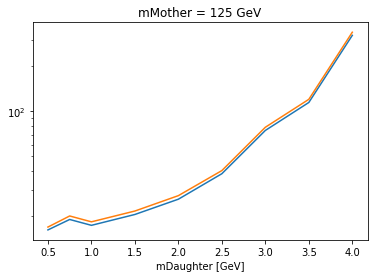

Looks good. Saving this to ggH_gg_LHC13_ATLAS_139.json


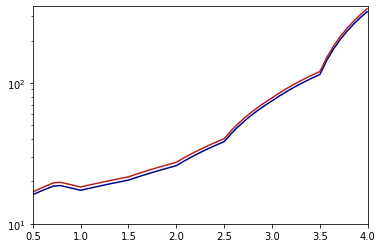

In [2]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1789583/Table%203/1/csv"
)
df = dfs[2].rename(
    columns={"$a$ masses [GeV]": "mDaughter", r"Observed $a\to gg$ limits [pb]": "obs"}
)
df["exp"] = dfs[0]["Expected $a\\to gg$ limits with $\\pm 1 \\sigma$ fluctations [pb]"]
df["mMother"] = 125

limitFile = implementChainDecayLimit(
    "2004.01678",
    {"production": ["ggH"], "chain": "Z", "decay": ["gg"]},
    "https://doi.org/10.17182/hepdata.93626.v1/t3",
    df,
    idSuffix=1,
    massResolution={
        "daughter": {
            "absolute": 0.2,  # guess
            "relative": 0,
        },
        "mother": {"absolute": 10, "relative": 0},  # 15GeV signal region
    },
    prefix="ggH_gg",
)

lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("Z", "h1", 1.0)
h1.setDecayWidth("gg", 1.0)
hh.setMass(125)
hm = np.linspace(0.5, 4)
r = np.linspace(10, 350)


def testAgainstLimit(mass, rate):
    h1.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## `pp > h125 > Z a > Z ss` [2004.01678](https://arxiv.org/abs/2004.01678)

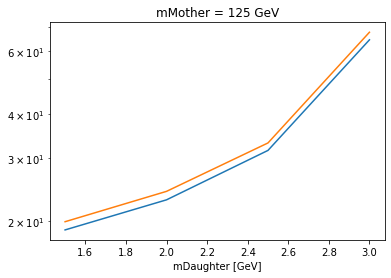

Looks good. Saving this to ggH_ss_LHC13_ATLAS_139.json


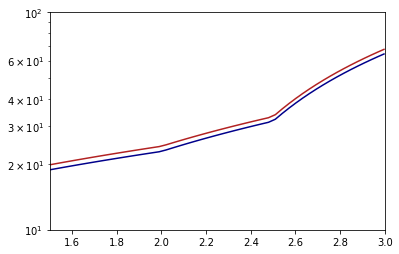

In [3]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1789583/Table%203/1/csv"
)
df = dfs[5].rename(
    columns={
        "$a$ masses [GeV]": "mDaughter",
        r"Observed $a\to s\bar{s}$ limits [pb]": "obs",
    }
)
df["exp"] = dfs[3][
    "Expected $a\\to s\\bar{s}$ limits with $\\pm 1 \\sigma$ fluctations [pb]"
]
df["mMother"] = 125
df = df.dropna()

limitFile = implementChainDecayLimit(
    "2004.01678",
    {"production": ["ggH"], "chain": "Z", "decay": ["ss"]},
    "https://doi.org/10.17182/hepdata.93626.v1/t3",
    df,
    idSuffix=2,
    massResolution={
        "daughter": {
            "absolute": 0.2,  # guess
            "relative": 0,
        },
        "mother": {"absolute": 10, "relative": 0},  # 15GeV signal region
    },
    prefix="ggH_ss",
)

lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("Z", "h1", 1.0)
h1.setDecayWidth("ss", 1.0)
hh.setMass(125)
hm = np.linspace(1.5, 3)
r = np.linspace(10, 100)


def testAgainstLimit(mass, rate):
    h1.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()
